Weight, W = [1. 1.] Bias, b = -1


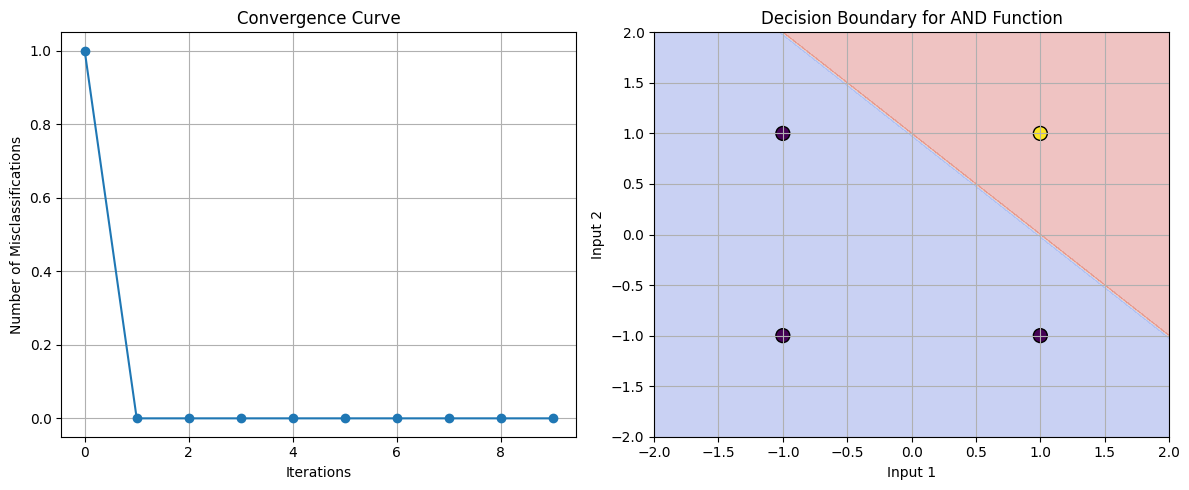

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation function (bipolar step function)
def activation(x):
    return np.where(x > 0, 1, np.where(x<0,-1,0))

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            error_count = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = activation(linear_output)

                # Update weights and bias
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                error_count += int(update != 0.0)
            self.errors.append(error_count)

    def predict(self, X):
        print(f"Weight, W = {self.weights} Bias, b = {self.bias}")  
        linear_output = np.dot(X, self.weights) + self.bias
        return activation(linear_output)

# Generate dataset for AND function with bipolar inputs
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([-1, -1, -1, 1])  # bipolar targets for AND function

# Create and train the perceptron
perceptron = Perceptron(learning_rate=1, n_iterations=10)
perceptron.fit(X, y)

# Plotting the convergence curve
plt.figure(figsize=(12, 5))

# Convergence curve
plt.subplot(1, 2, 1)
plt.plot(range(len(perceptron.errors)), perceptron.errors, marker='o')
plt.title('Convergence Curve')
plt.xlabel('Iterations')
plt.ylabel('Number of Misclassifications')
plt.grid()

# Plotting decision boundary
plt.subplot(1, 2, 2)
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
plt.title('Decision Boundary for AND Function')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.grid()

plt.tight_layout()
plt.show()